> [GNN-Static](https://arxiv.org/abs/2210.08864) - it plans a trajectory by prioritizing the edge to explore based on a Graph Neural Network heuristic function

In [1]:
%cd -q ..

In [2]:
from environment.static.dual_kuka_env import DualKukaEnv
from objects.static.voxel import VoxelObject
from wrappers.obstacles import ObstaclePositionWrapper
env = DualKukaEnv(objects=[VoxelObject(base_orientation=[0, 0, 0, 1], base_position=[0, 1, 1], half_extents=[0.2, 0.2, 0.2]),
                           VoxelObject(base_orientation=[0, 0, 0, 1], base_position=[0, -0.5, 0.7], half_extents=[0.3, 0.1, 0.4])])
env = ObstaclePositionWrapper(env)

pybullet build time: Dec  1 2021 18:33:43


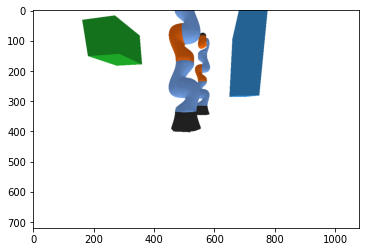

In [3]:
# visualize environment
%matplotlib inline
import matplotlib.pyplot as plt
env.load()
plt.imshow(env.render())
plt.show()

In [4]:
from planner.learned.GNN_static_planner import GNNStaticPlanner

In [5]:
# sample a non-trival problem setting and solve
while True:
    start, goal = env.robot.sample_random_init_goal()
    if not env.edge_fp(start, goal):
        result = GNNStaticPlanner(num_batch=100, model_args=dict(config_size=env.robot.config_dim, 
                                                                         embed_size=64, 
                                                                         obs_size=6)).plan(env, start, goal, timeout=('time', 100))
        if result.solution:
            break

In [6]:
# Visualization
from time import sleep
def visualize_traj(env, trajectory):  
    gifs = []
    for timestep in np.linspace(0, len(trajectory.waypoints)-1, 100):
        env.robot.set_config(trajectory.get_spec(timestep))
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]) 
    return gifs

argv[0]=--background_color_red=1.0
argv[1]=--background_color_green=1.0
argv[2]=--background_color_blue=1.0
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=5
argv[0] = --unused
argv[1] = --background_color_red=1.0
argv[2] = --background_color_green=1.0
argv[3] = --background_color_blue=1.0
argv[4] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3080/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 470.161.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 470.161.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 3080/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
sta


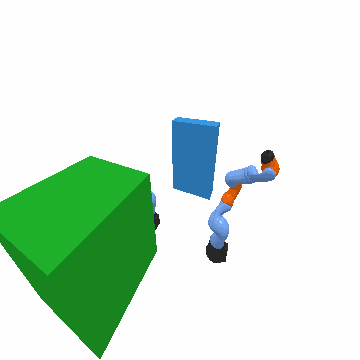

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
from objects.trajectory import WaypointLinearTrajectory

env.load(GUI=True)
# generate collision-free trajectory
traj = WaypointLinearTrajectory(result.solution)    
gifs = visualize_traj(env, traj)
save_gif(gifs, f'data/visualization/static_gnn.gif')
b64 = base64.b64encode(open(f'data/visualization/static_gnn.gif', 'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))    

In [10]:
p.disconnect()

numActiveThreads = 0
stopping threads
destroy semaphore
Thread with taskId 0 exiting
Thread TERMINATED
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
